In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\suman\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\suman\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suman\AppData\Roaming\nltk_data...


True

## Dataset link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data.shape

(50000, 2)

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
# The "word_frequencies" function generates a bar plot showing the most frequently occurring
# words in the input column of text data.

# The "filter_review" and "stopwords_filtering" functions are used for text preprocessing
# by removing non-alphabetic characters, converting to lowercase, removing stopwords, and returning the filtered text.


eng_stopwords = set(stopwords.words('english'))

def word_frequencies(col, items): 
  text = ' '.join([plot for plot in col]) 
  text = text.split() 
  freq_dist = nltk.FreqDist(text) 
  words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'Frequency':list(freq_dist.values())}) 
  
  order = words_df.nlargest(columns="Frequency", n = items) 
  
  plt.figure(figsize=(20,20)) 
  ax = sns.barplot(data=order, x= "Frequency", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

def filter_review(review):
    review = re.sub("\'", "", review) 
    review = re.sub("[^a-zA-Z]"," ",review) 
    review = ' '.join(review.split())
    review = review.lower()
    review = review.replace("br", "")
    
    return review

def stopwords_filtering(text):
    filtered_text = [x for x in text.split() if not x in eng_stopwords]
    return ' '.join(filtered_text)

def lemmatization_plot(text):
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize(x) for x in text.split()]
    return ' '.join(filtered_text)

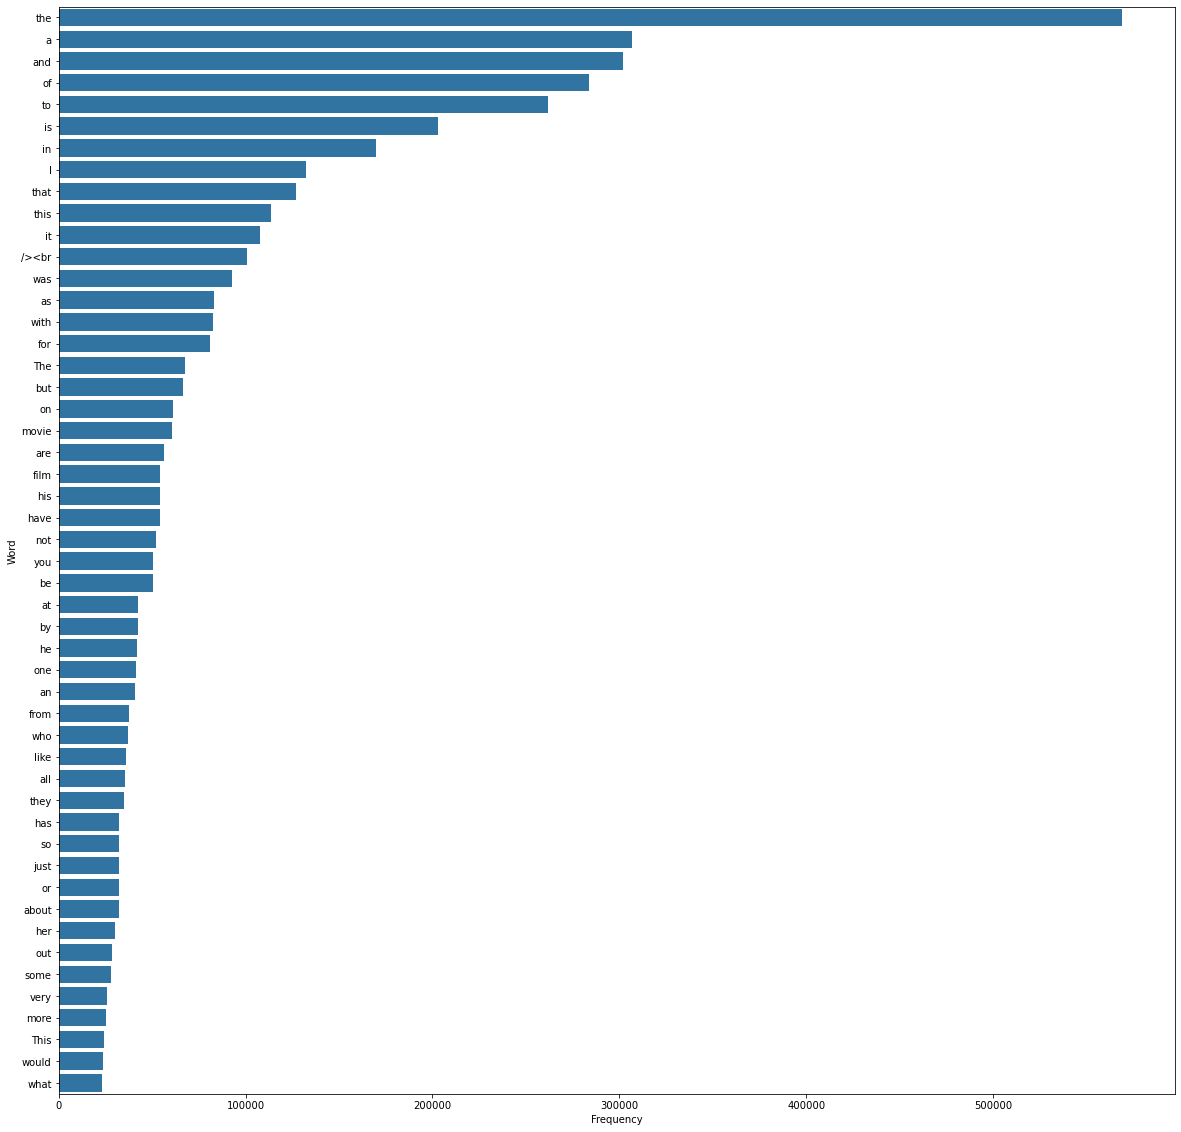

In [7]:
word_frequencies(data['review'], 50)

In [8]:
data['filtered_review'] = data['review'].apply(lambda x:filter_review(x))
data

,review,sentiment,filtered_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming te...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


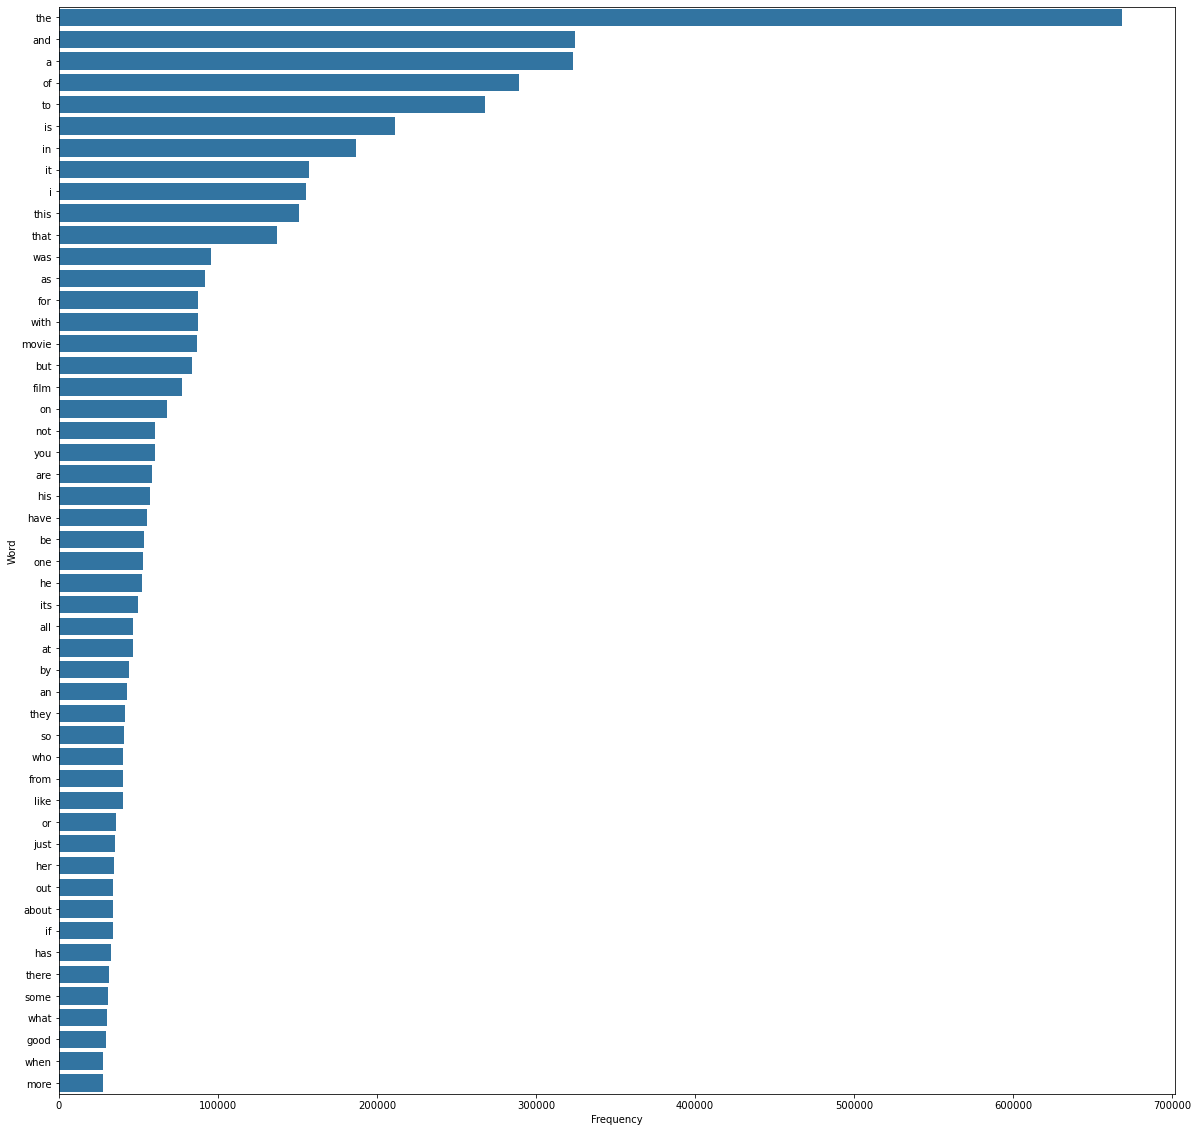

In [9]:
word_frequencies(data['filtered_review'], 50)

In [10]:
data['filtered_review'] = data['filtered_review'].apply(lambda x: stopwords_filtering(x))
data

,review,sentiment,filtered_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


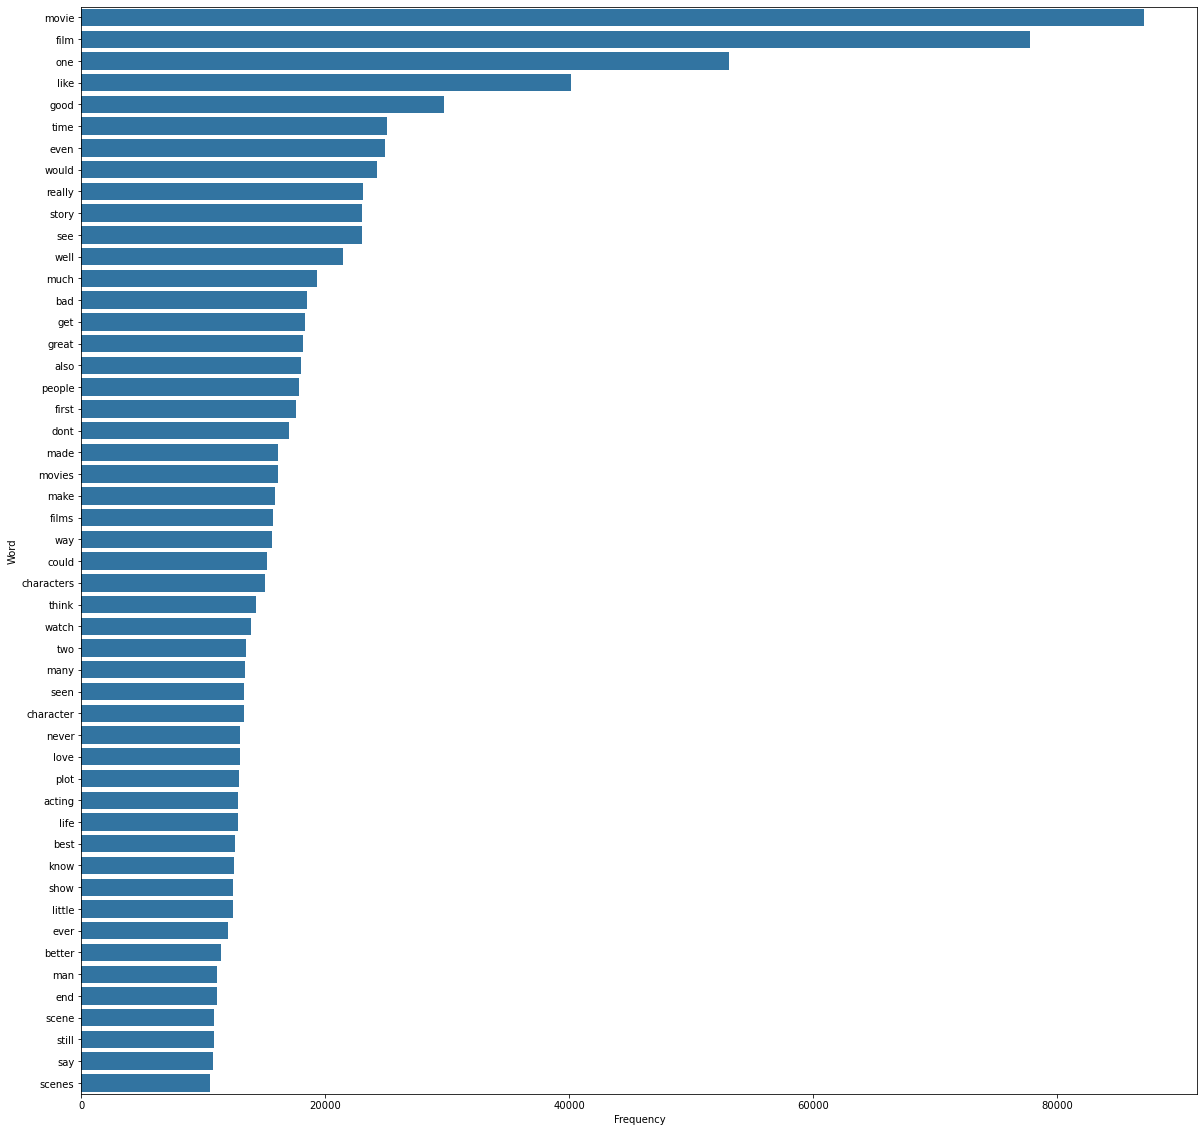

In [11]:
word_frequencies(data['filtered_review'], 50)

In [12]:
data['filtered_review'] = data['filtered_review'].apply(lambda x: lemmatization_plot(x))
data

,review,sentiment,filtered_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


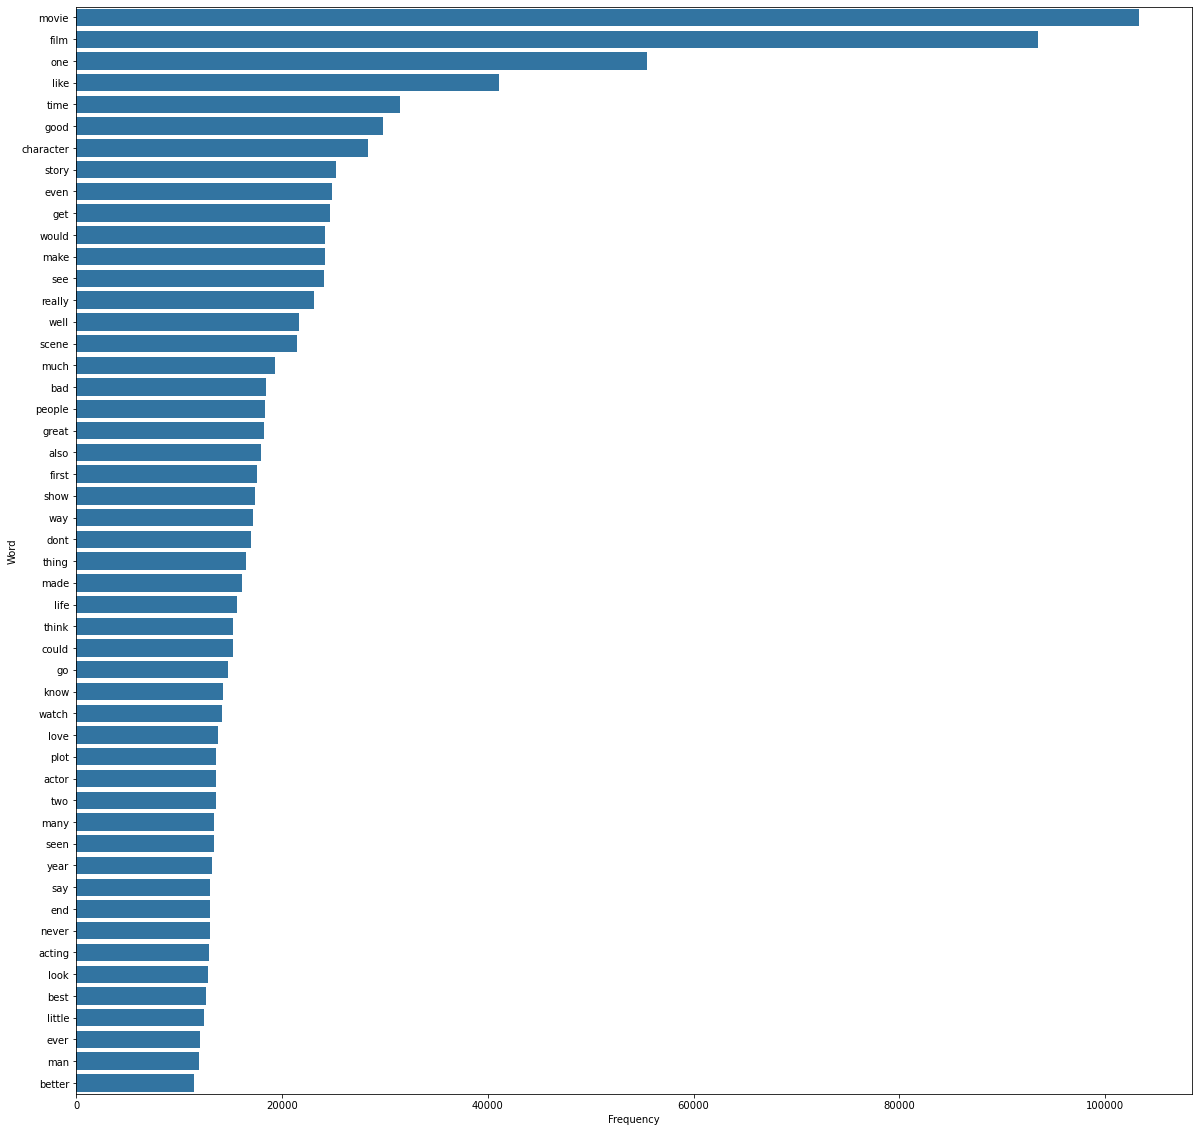

In [13]:
word_frequencies(data['filtered_review'], 50)

In [14]:
#data.to_csv("data.csv")